In [1]:
import os
import subprocess
from matplotlib import pyplot as plt
import numpy as np
import importlib
import copy
import statistics as stats
import random
import networkx as nx
import os
import seaborn as sns

In [2]:
path_seed="/n/home01/spetti/spetti_space/pass_rate_benchmark/splits/seed/"
path_full="/n/home01/spetti/spetti_space/pass_rate_benchmark/splits/full/"

In [3]:
def get_pair(filename, train, test):
    trains=[]
    tests=[]
    names=[]
    with open(filename,"r") as fh:
        for y in fh:
            y=y.split()
            if int(y[5])>=train and int(y[6])>=test:
                names.append(y[0])
                trains.append(int(y[5]))
                tests.append(int(y[6]))
            
    return trains,tests, names

In [4]:
def display_medians(data):
    for alg in data.keys():
        print(alg)
        print("training median: "+str(np.median(data[alg][0])))
        print("test median: "+str(np.median(data[alg][1])))

In [5]:
def get_restricted_data(data, algs):
    r_data={}
    name_set=[]
    for alg in algs:
        if len(name_set)==0:
            name_set=set(data[alg][2])
        else:
            name_set=name_set.intersection(set(data[alg][2]))
    print("there are "+str(len(name_set))+" common families")
    for alg in algs:
        new_trains=[]
        new_tests=[]
        new_names=[]
        for i in range(len(data[alg][0])):
            if data[alg][2][i] in name_set:
                new_names.append(data[alg][2][i])
                new_trains.append(data[alg][0][i])
                new_tests.append(data[alg][1][i])
        r_data[alg]=(new_trains,new_tests,new_names)
    return r_data

In [6]:
seed_data={}
algs=['blue','cobalt','cluster','random70']
for alg in algs:
    train_sizes,test_sizes, names=get_pair(path_seed+alg+"_seed.tbl", 10, 2)
    seed_data[alg]=(train_sizes, test_sizes, names)
display_medians(seed_data)
r_seed_data=get_restricted_data(seed_data, algs[0:3])
display_medians(r_seed_data)


blue
training median: 30.0
test median: 4.0
cobalt
training median: 34.0
test median: 4.0
cluster
training median: 43.0
test median: 6.0
random70
training median: 52.0
test median: 3.0
there are 2363 common families
blue
training median: 35.0
test median: 8.0
cobalt
training median: 39.0
test median: 7.0
cluster
training median: 43.0
test median: 6.0


In [7]:
full_data={}
algs=['blue', 'cobalt','cluster','random70']
for alg in algs:
    train_sizes,test_sizes, names=get_pair(path_full+alg+"_full.tbl", 400, 20)
    full_data[alg]=(train_sizes, test_sizes, names)
display_medians(full_data)
r_full_data=get_restricted_data(full_data, algs)
display_medians(r_full_data)
r_full_data=get_restricted_data(full_data, algs[0:3])
display_medians(r_full_data)

blue
training median: 868.0
test median: 43.0
cobalt
training median: 1245.0
test median: 50.0
cluster
training median: 2709.0
test median: 52.0
random70
training median: 6460.5
test median: 36.5
there are 183 common families
blue
training median: 3212.0
test median: 520.0
cobalt
training median: 3904.0
test median: 529.0
cluster
training median: 8087.0
test median: 197.0
random70
training median: 6911.0
test median: 35.0
there are 1070 common families
blue
training median: 1047.0
test median: 117.0
cobalt
training median: 1229.5
test median: 111.5
cluster
training median: 1882.0
test median: 49.0


In [37]:
def plot(data, save_name, myxlim, myylim,r_data=False):
    for alg in data.keys():
        print(alg)
    #pos=poss[i]
   # i+=1
        #sns.set(rc={'figure.figsize':(3,3)})
        mp=sns.jointplot(x=data[alg][0], y=data[alg][1], kind='kde', xlim=myxlim, ylim=myylim, height=3.5)
        sns.scatterplot([np.median(data[alg][0])],[np.median(data[alg][1])],ax=mp.ax_joint, color='tab:green',linewidth=0)
        if r_data!='False' and alg in r_data.keys():
            sns.scatterplot([np.median(r_data[alg][0])],[np.median(r_data[alg][1])],ax=mp.ax_joint, s=75, color='white', marker='x')
        mp.ax_joint.set_xscale('log')
        mp.ax_joint.set_yscale('log')
        fs=12
        mp.ax_joint.tick_params(labelsize=fs)
        mp.set_axis_labels('Training set size', 'Test set size',fontsize=fs)
        plt.savefig("/n/home01/spetti/figures/"+save_name+"_"+alg+".pdf", bbox_inches='tight')

blue
cobalt
cluster
random70


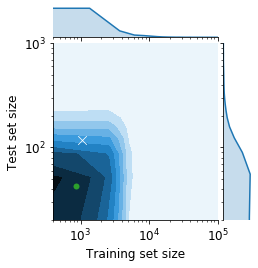

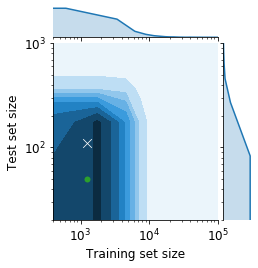

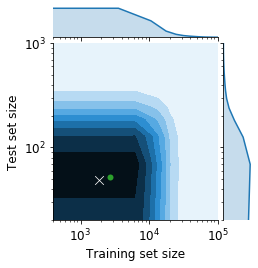

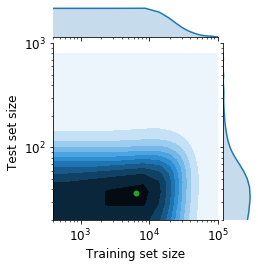

In [38]:
plot(full_data,'full',(400,100000),(20,1000), r_full_data)

blue
cobalt
cluster
random70


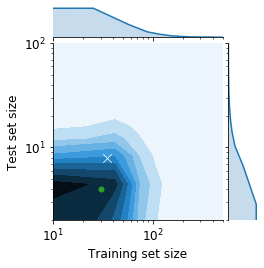

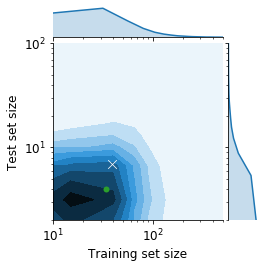

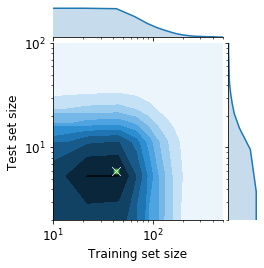

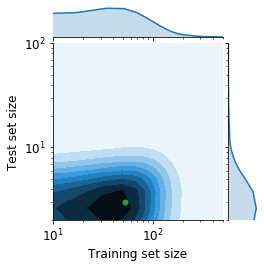

In [39]:
plot(seed_data,'seed', (10,500), (2,100), r_seed_data)